# Linear Discriminant Analysis

We are going to implement LDA using the iris dataset. We can get the dataset from scikit-learn package. Iris is a three class dataset.

In [ ]:
# importing required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load iris dataset
iris=datasets.load_iris()

In [ ]:
# convert dataset into a pandas dataframe
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']


In [ ]:
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


### We’ll build a linear discriminant analysis model to classify which species a given flower belongs to.
 We’ll use the following predictor variables in the model:

    Sepal length
    Sepal width
    Petal length
    Petal width
    
And we’ll use them to predict the response variable Species, which takes on the following three potential classes:

    setosa
    versicolor
    virginica

In [ ]:
# fitting the model
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [ ]:
# evaluating the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9800000000000001


### Visualize the results

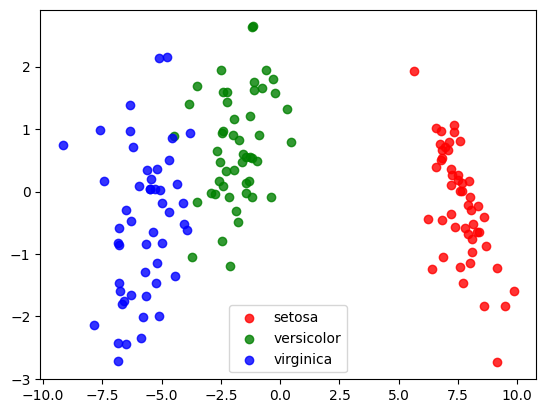

In [ ]:
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names


plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

We can clearly see that the three classes are seperated and can be distinguished easily.

### Prediction
We can also use the model to predict which class a new flower belongs to, based on input values

In [ ]:
# define new observation
new = [5, 2, 1, .4]

# predict which class the new observation belongs to
model.predict([new])

array([0])

The model predicts this new observation to belong to the species called setosa.

<ipython-input-7-c5c60f5f846e>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-c5c60f5f846e>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


Accuracy: 0.94


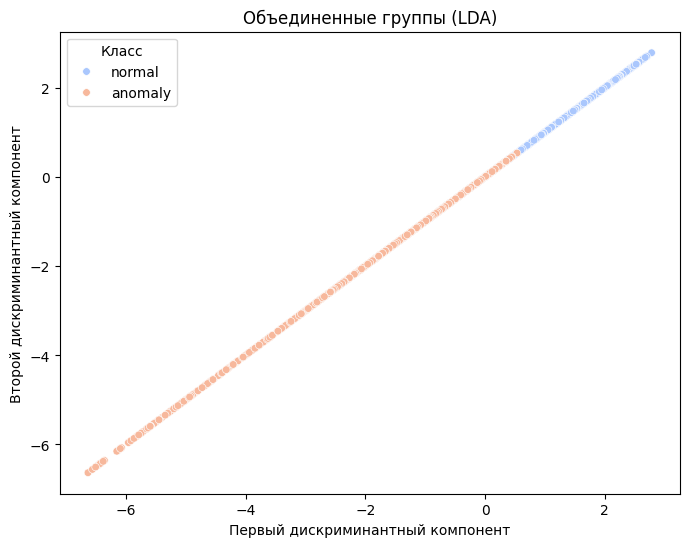

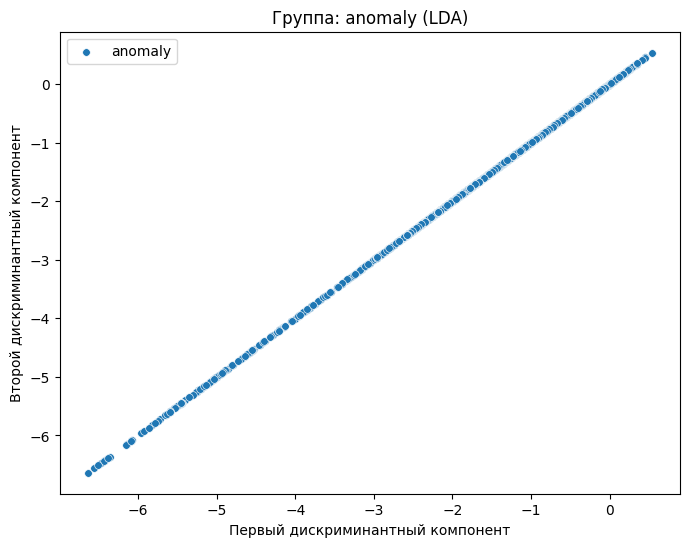

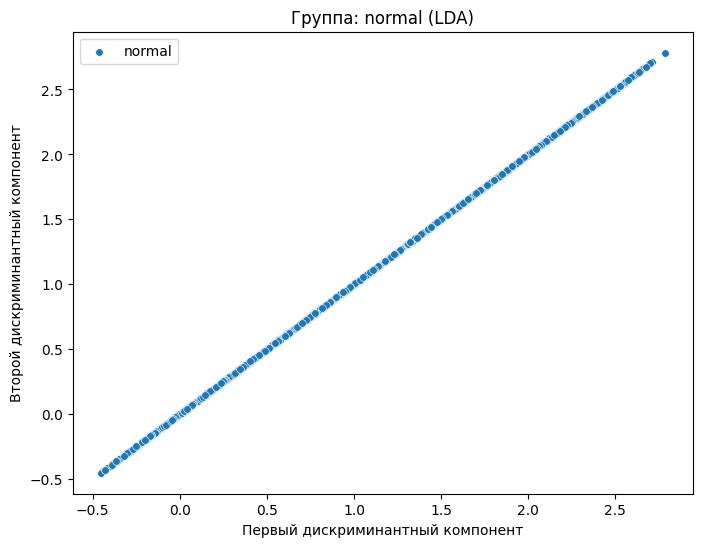

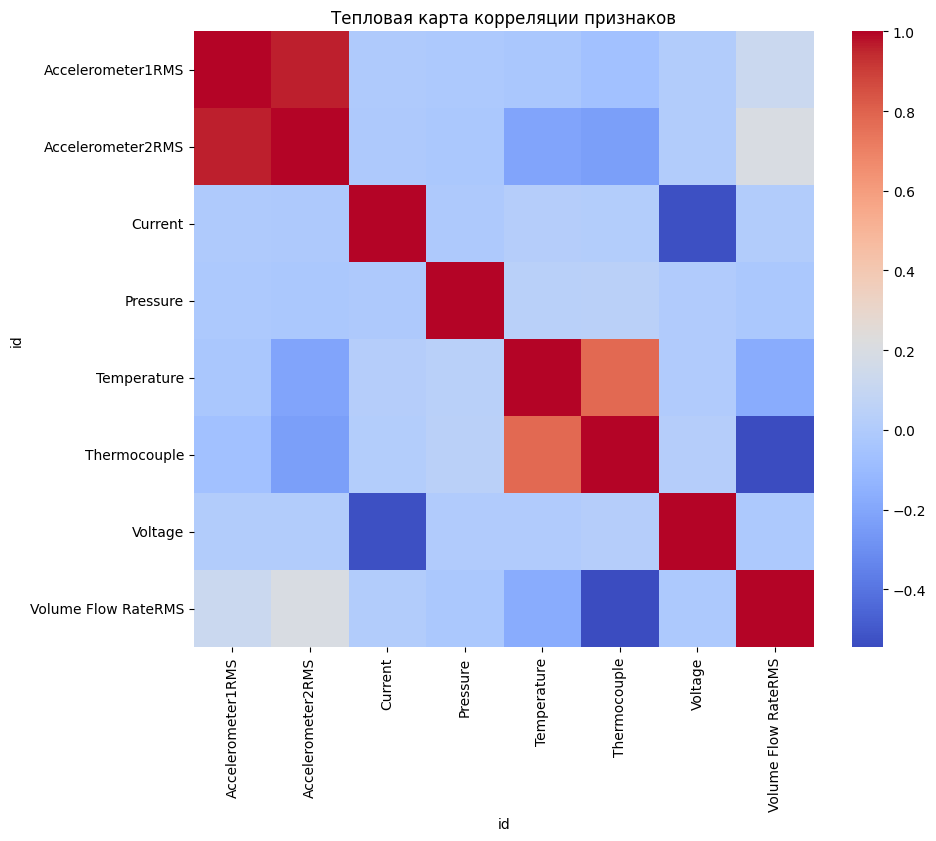

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('SKABteaser.csv', sep=';', parse_dates=['datetime'])
data['datetime'] = pd.to_datetime(data['datetime'])

# Преобразование данных
df = data.pivot(index='datetime', columns='id', values='value').reset_index()

# Проверка на пропуски
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Добавление меток классов для обучения (пример: метки аномалий)
# Если метки отсутствуют, создайте их вручную, основываясь на вашем домене
# Примерно разбиваем данные на нормальные и аномальные
df['class'] = np.where(df.index < len(df) // 2, 'normal', 'anomaly')  # Для демонстрации

# Выбор признаков и меток
X = df.drop(columns=['datetime', 'class'])
y = df['class']

# Разделение данных на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Выполнение LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# Оценка точности
accuracy = lda.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Визуализация результатов
# 1. Объединенные группы
lda_transformed = lda.transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=lda_transformed[:, 0], y=lda_transformed[:, 0], hue=y, palette='coolwarm', s=30)
plt.title("Объединенные группы (LDA)")
plt.xlabel("Первый дискриминантный компонент")
plt.ylabel("Второй дискриминантный компонент")
plt.legend(title="Класс")
plt.show()

# 2. Отдельные группы
for label in np.unique(y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=lda_transformed[y == label][:, 0], y=lda_transformed[y == label][:, 0], label=label, s=30)
    plt.title(f"Группа: {label} (LDA)")
    plt.xlabel("Первый дискриминантный компонент")
    plt.ylabel("Второй дискриминантный компонент")
    plt.legend()
    plt.show()

# 3. Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("Тепловая карта корреляции признаков")
plt.show()